# Task 2 : Load data

In [2]:
df_categories=read.csv("/kaggle/input/supermarket-2021-2023-data/categories.csv")
df_customers=read.csv("/kaggle/input/supermarket-2021-2023-data/customers.csv")
df_in_store_sales=read.csv("/kaggle/input/supermarket-2021-2023-data/in_store_sales.csv")
df_marketing=read.csv("/kaggle/input/supermarket-2021-2023-data/marketing.csv")
df_online_sales=read.csv("/kaggle/input/supermarket-2021-2023-data/online_sales.csv")

### View top 6 rows

In [3]:
head(df_categories)

,Category_id,Category_name,Number_of_products
,<int>,<chr>,<int>
1,1,Clothing,605
2,2,Shoes,408
3,3,Books,999
4,4,Cosmetics,447
5,5,Food & Beverage,936
6,6,Toys,996


In [4]:
head(df_customers)

,customer_id,gender,age,payment_method
,<chr>,<chr>,<dbl>,<chr>
1,C241288,Female,28,Credit Card
2,C111565,Male,21,Debit Card
3,C266599,,20,Cash
4,C988172,Female,66,Credit Card
5,C189076,Female,53,Cash
6,C657758,,28,Credit Card


In [5]:
head(df_in_store_sales)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,sales_channel
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,in-store
2,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,in-store
3,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,in-store
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,in-store
5,I227836,C657758,Clothing,5,1500.40,24-05-2022,Forum Istanbul,in-store
6,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park,in-store


In [6]:
head(df_online_sales)

,invoice_no,customer_id,category,quantity,price,invoice_date,sales_channel
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,I173702,C988172,Shoes,5,3000.85,16-05-2021,online
2,I293112,C176086,Clothing,2,600.16,13-01-2021,online
3,I139207,C191708,Books,1,15.15,28-10-2022,online
4,I640508,C225330,Toys,4,143.36,31-07-2022,online
5,I336189,C555402,Clothing,2,600.16,03-06-2022,online
6,I688768,C362288,Shoes,5,3000.85,07-11-2021,online


In [7]:
head(df_marketing)

,Campaign_ID,Campaign_Type,Duration_Start,Duration_End,Target_Audience,Outcomes
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Print,2022-02-04,2022-07-04,Millennials,Low
2,2,TV,2021-07-08,2021-09-08,Gen Z,Low
3,3,Email,2021-09-14,2022-04-14,Local Community,Moderate
4,4,Email,2022-07-30,2022-10-30,Gen Z,Increased
5,5,Email,2022-06-10,2022-07-10,Gen Z,Moderate
6,6,TV,2021-04-08,2021-11-08,Gen Z,Moderate


# Task 3 : Data Cleaning and Processing

## Check for duplicated rows

In [8]:
print(any(duplicated(df_categories)))

[1] FALSE


In [9]:
print(any(duplicated(df_customers)))

[1] FALSE


In [10]:
print(any(duplicated(df_in_store_sales)))

[1] FALSE


In [11]:
print(any(duplicated(df_marketing)))

[1] FALSE


In [12]:
print(any(duplicated(df_online_sales)))

[1] FALSE


## Find and handle null values

In [13]:
#replace empty string values with NA
df_online_sales[df_online_sales == ""] <- NA
df_customers[df_customers == ""] <- NA
df_categories[df_categories == ""] <- NA
df_in_store_sales[df_in_store_sales == ""] <- NA
df_marketing[df_marketing == ""] <- NA

In [14]:
print(any(is.na(df_categories)))

[1] FALSE


In [15]:
print(any(is.na(df_customers)))

[1] TRUE


In [16]:
#ratio of missing values
total_rows <- nrow(df_customers)
missing_counts <- colSums(is.na(df_customers))
print(missing_counts/total_rows)

   customer_id         gender            age payment_method 
     0.0000000      0.2499975      0.2008808      0.0000000 


In [17]:
#fill missing gender with mode
gender_mode=names(which.max(table(df_customers$gender)))
df_customers$gender[is.na(df_customers$gender)] <- gender_mode

In [18]:
#fill missing age with median
median_age <- median(df_customers$age, na.rm = TRUE)
df_customers$age[is.na(df_customers$age)] <- median_age

In [19]:
#ratio of missing values
total_rows <- nrow(df_customers)
missing_counts <- colSums(is.na(df_customers))
print(missing_counts/total_rows)

   customer_id         gender            age payment_method 
             0              0              0              0 


In [20]:
print(any(is.na(df_in_store_sales)))

[1] FALSE


In [21]:
print(any(is.na(df_marketing)))

[1] FALSE


In [22]:
print(any(is.na(df_online_sales)))

[1] FALSE


# Task 4 : Data merging and Integration

## Merge in-store and online sales data

In [23]:
library(dplyr)
df_total_sales <- bind_rows(df_in_store_sales, df_online_sales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [24]:
head(df_total_sales)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,sales_channel
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon,in-store
2,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul,in-store
3,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity,in-store
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon,in-store
5,I227836,C657758,Clothing,5,1500.40,24-05-2022,Forum Istanbul,in-store
6,I121056,C151197,Cosmetics,1,40.66,13-03-2022,Istinye Park,in-store


In [25]:
tail(df_total_sales)

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall,sales_channel
,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
99452,I403904,C142643,Toys,1,35.84,02-11-2022,NA,online
99453,I161104,C363191,Toys,5,179.20,08-02-2021,NA,online
99454,I105959,C131810,Clothing,4,1200.32,01-02-2021,NA,online
99455,I219422,C441542,Souvenir,5,58.65,21-09-2022,NA,online
99456,I824010,C103292,Food & Beverage,2,10.46,28-03-2021,NA,online
99457,I232867,C273973,Souvenir,3,35.19,15-10-2022,NA,online


## Merge sales and customer data

In [26]:
df_customers_sales <- merge(df_customers, df_total_sales, by="customer_id", all=FALSE)

In [27]:
head(df_customers_sales)

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall,sales_channel
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>
1,C100004,Male,61,Credit Card,I178410,Clothing,5,1500.40,26-11-2021,Metrocity,in-store
2,C100005,Male,34,Cash,I158163,Shoes,2,1200.34,03-03-2023,Kanyon,in-store
3,C100006,Female,44,Credit Card,I262373,Toys,3,107.52,01-12-2022,NA,online
4,C100012,Male,25,Cash,I334895,Food & Beverage,5,26.15,15-08-2021,Kanyon,in-store
5,C100019,Female,21,Credit Card,I202043,Toys,1,35.84,25-07-2021,NA,online
6,C100025,Male,43,Debit Card,I303349,Toys,2,71.68,03-06-2021,NA,online


# Task 5: Exploratory Data Analysis

In [28]:
summary_numeric <- summary(df_customers_sales[, sapply(df_customers_sales, is.numeric)])
print(summary_numeric)

      age           quantity         price        
 Min.   :18.00   Min.   :1.000   Min.   :   5.23  
 1st Qu.:34.00   1st Qu.:2.000   1st Qu.:  45.45  
 Median :43.00   Median :3.000   Median : 203.30  
 Mean   :43.33   Mean   :3.003   Mean   : 689.26  
 3rd Qu.:53.00   3rd Qu.:4.000   3rd Qu.:1200.32  
 Max.   :69.00   Max.   :5.000   Max.   :5250.00  


In [29]:
library(ggplot2)

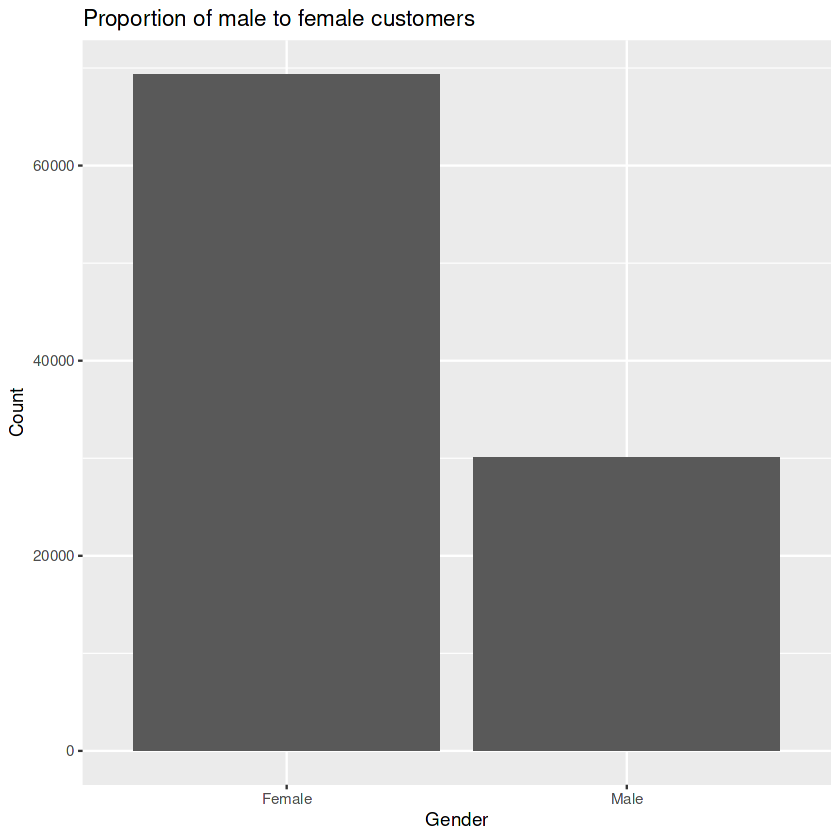

In [30]:
#Proportion of male to female customers
ggplot(df_customers, aes(x = gender)) +
  geom_bar() +
  xlab("Gender") +
  ylab("Count") +
  ggtitle("Proportion of male to female customers")

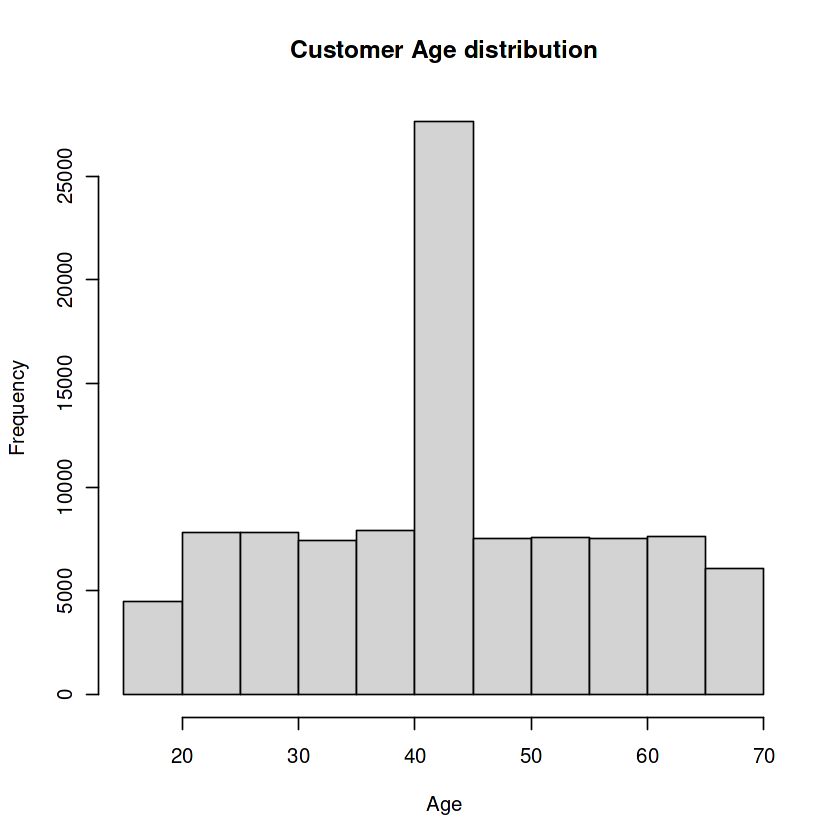

In [31]:
#distribution of customer age
hist(df_customers$age, xlab = "Age", ylab = "Frequency", main = "Customer Age distribution")

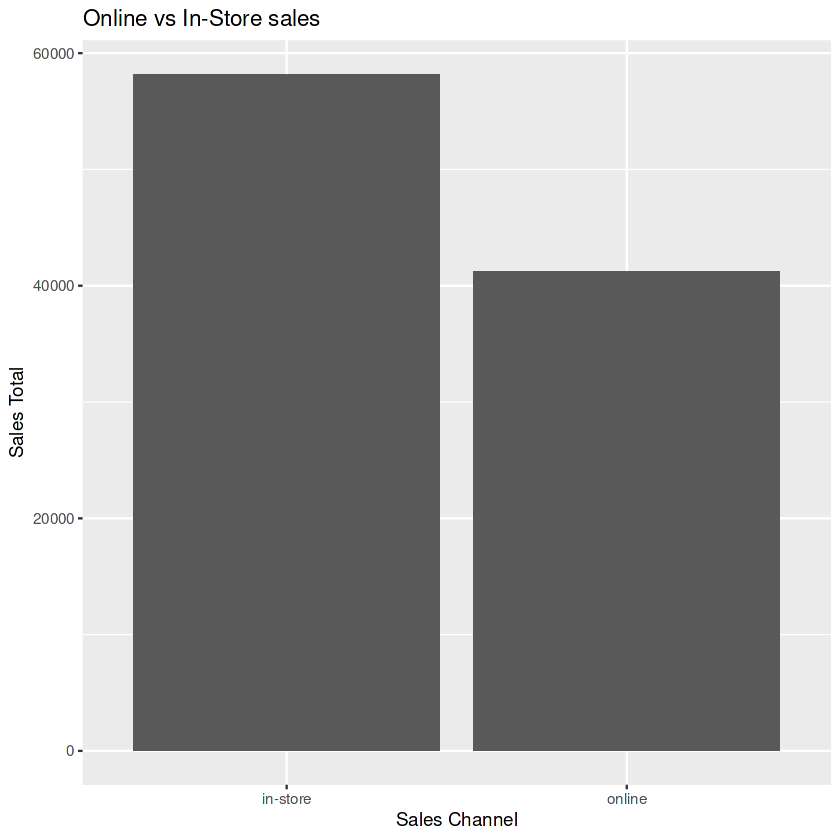

In [32]:
#Sales in-store vs Online
ggplot(df_total_sales, aes(x = sales_channel)) +
  geom_bar() +
  xlab("Sales Channel") +
  ylab("Sales Total") +
  ggtitle("Online vs In-Store sales")

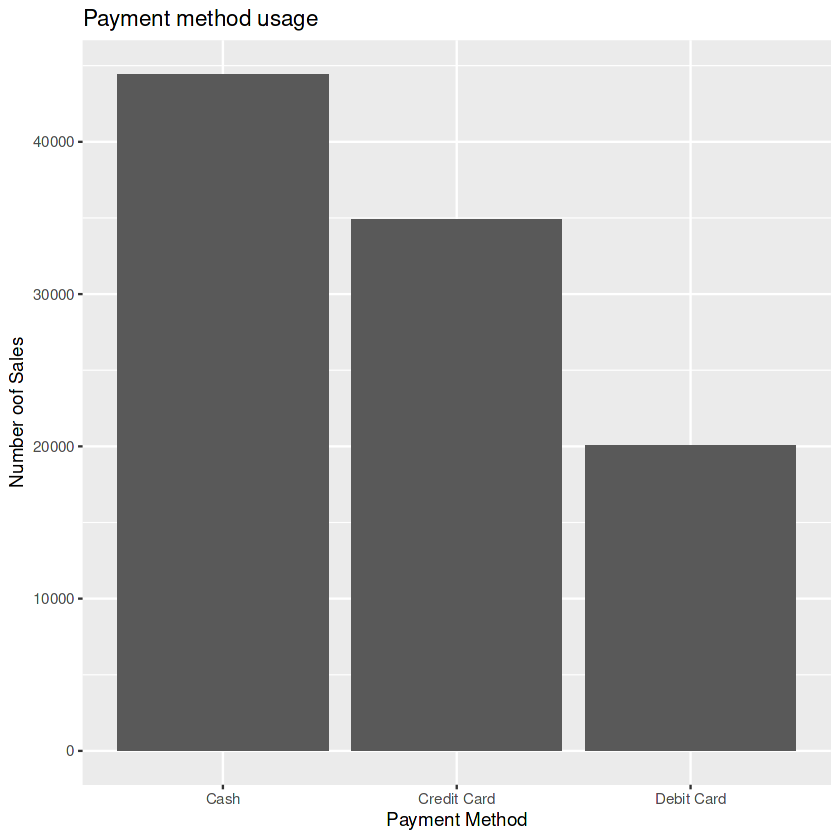

In [34]:
#Payment method usage
ggplot(df_customers_sales, aes(x = payment_method)) +
  geom_bar() +
  xlab("Payment Method") +
  ylab("Number of Sales") +
  ggtitle("Payment method usage")

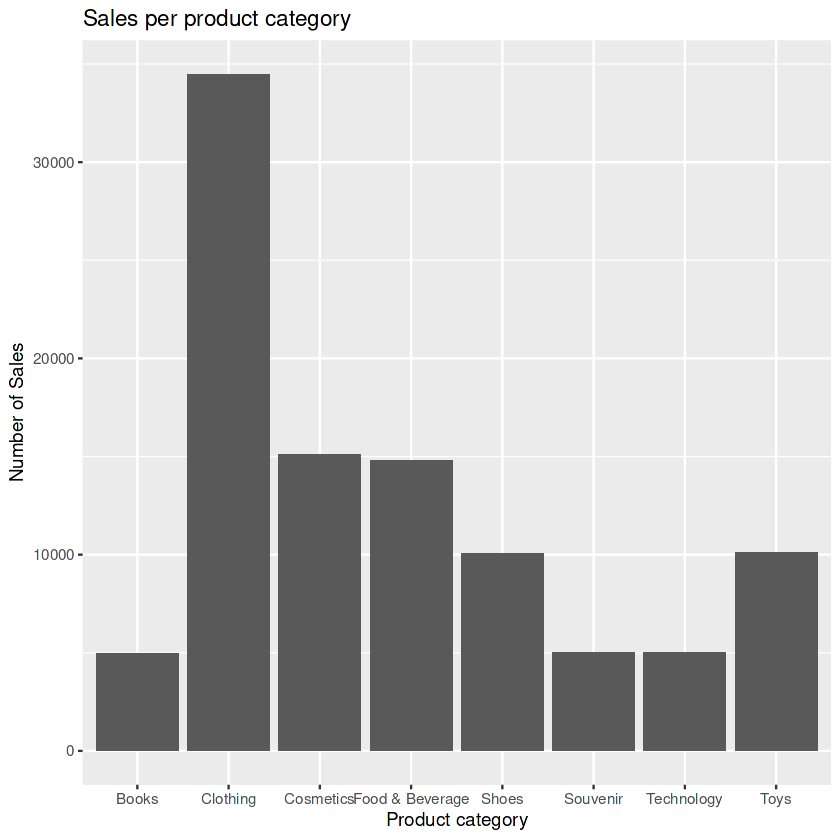

In [35]:
#Sales for each product category
ggplot(df_customers_sales, aes(x = category)) +
  geom_bar() +
  xlab("Product category") +
  ylab("Number of Sales") +
  ggtitle("Sales per product category")

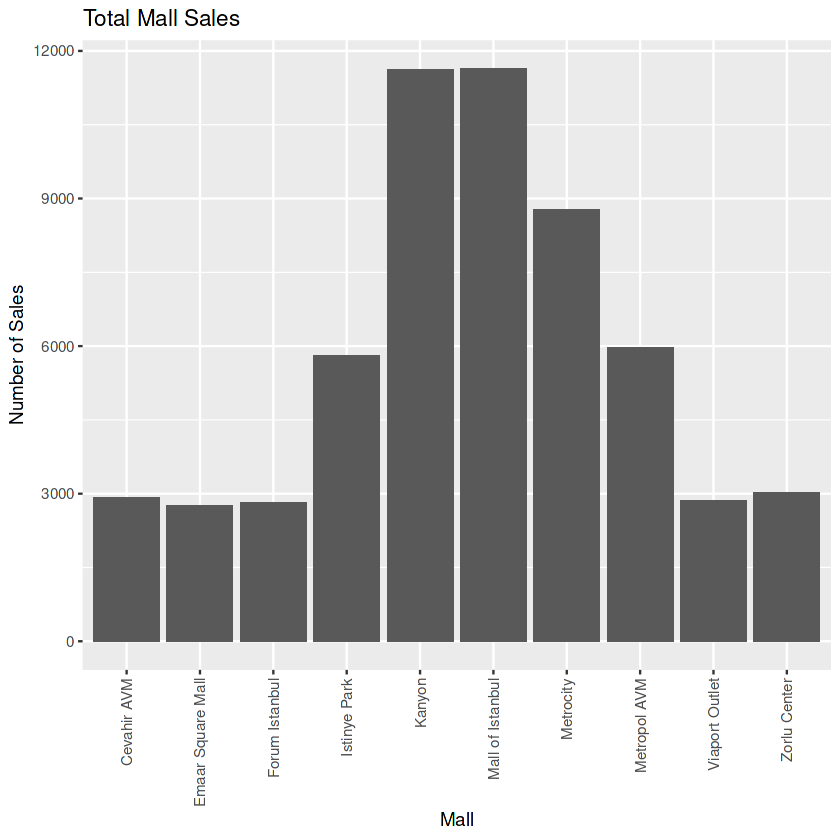

In [38]:
#Mall Sales comparison
ggplot(df_in_store_sales, aes(x = shopping_mall)) +
  geom_bar() +
  xlab("Mall") +
  ylab("Number of Sales") +
  ggtitle("Total Mall Sales") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

# Task 6 : Validation and Quality Assurance

In [43]:
#Check the column on which merge is performed has matching values
unique_values_customers <- unique(df_customers$customer_id)
unique_values_total_sales <- unique(df_total_sales$customer_id)
mismatched_values <- any(!unique_values_customers %in% unique_values_total_sales)
print(mismatched_values)

[1] FALSE


In [42]:
#Check that online sales have NA for shopping_mall
online_sales <- df_customers_sales[df_customers_sales$sales_channel=="online", ]
na_in_all_shopping_mall <- all(is.na(online_sales$shopping_mall))
print(na_in_all_shopping_mall)

[1] TRUE
